# Linear Regression

First, we will explore linear regression with one variable. For this, we will study the data of profit vs population. 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Loading the data. 

In [12]:
train_file_path = "/home/shantanu/PycharmProjects/Kaggle/DAT21_Linear_Regression_Assignment/train.csv"
test_file_path = "/home/shantanu/PycharmProjects/Kaggle/DAT21_Linear_Regression_Assignment/test.csv"
data = pd.read_csv(train_file_path)

## Data exploration

(10000, 12)


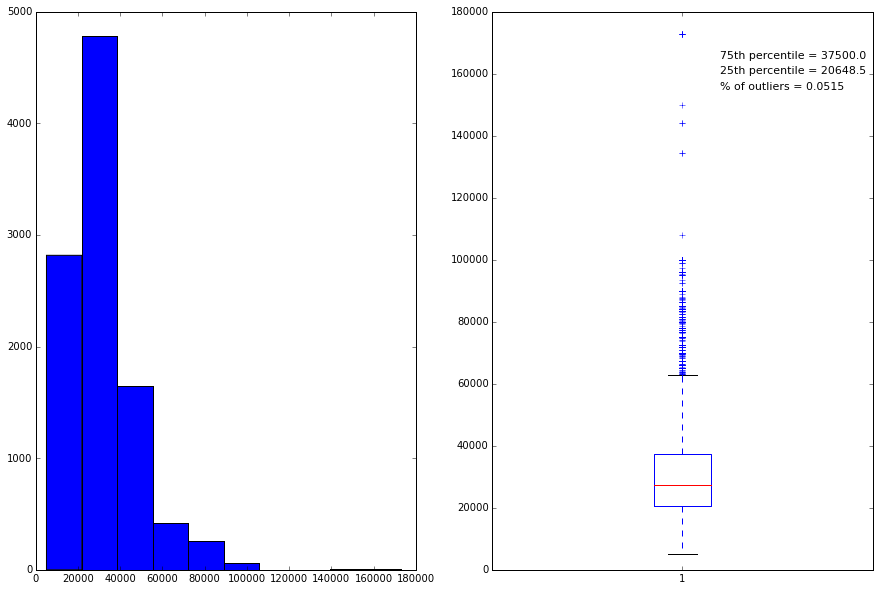

In [162]:
print data.shape # (10000, 12)

# Plotting the salary in histogram and box plot
salary = data['SalaryNormalized'].values

f = data['SalaryNormalized'].describe()
IQR = f['75%'] - f['25%']
upper_outlier_boundary = f['75%'] + 1.5*IQR
lower_outlier_boundary = f['25%'] - 1.5*IQR

fig = plt.figure(figsize=(15,10))
ax_hist = fig.add_subplot(121)
ax_hist.hist(salary)
ax_box = fig.add_subplot(122)
ax_box.boxplot(salary)
ax_box.text(1.1,165000, '75th percentile = {}'.format(f['75%']), fontsize=11)
ax_box.text(1.1,160000, '25th percentile = {}'.format(f['25%']), fontsize=11)
ax_box.text(1.1,155000, '% of outliers = {}'.format(sum(salary>up_outlier_boundary) / float(data.shape[0])), fontsize=11)
plt.show()

In [188]:
print data.head

<bound method DataFrame.head of             Id                                              Title  \
0     12612628                        Engineering Systems Analyst   
1     12612830                            Stress Engineer Glasgow   
2     12612844                   Modelling and simulation analyst   
3     12613049  Engineering Systems Analyst / Mathematical Mod...   
4     12613647         Pioneer, Miser Engineering Systems Analyst   
5     13179816         Engineering Systems Analyst Water Industry   
6     14131336          Senior Subsea Pipeline Integrity Engineer   
7     14663196  RECRUITMENT CONSULTANT  INDUSTRIAL / COMMERCIA...   
8     14663197  RECRUITMENT CONSULTANT  CONSTRUCTION / TECHNIC...   
9     15395797                             Subsea Cables Engineer   
10    19047429            Trainee Mortgage Advisor  East Midlands   
11    20199757                   PROJECT ENGINEER, PHARMACEUTICAL   
12    20638787                Principal Composite Stress Engineer   
13

# Exploring catagorical variables

## Exploring LocationNormalized

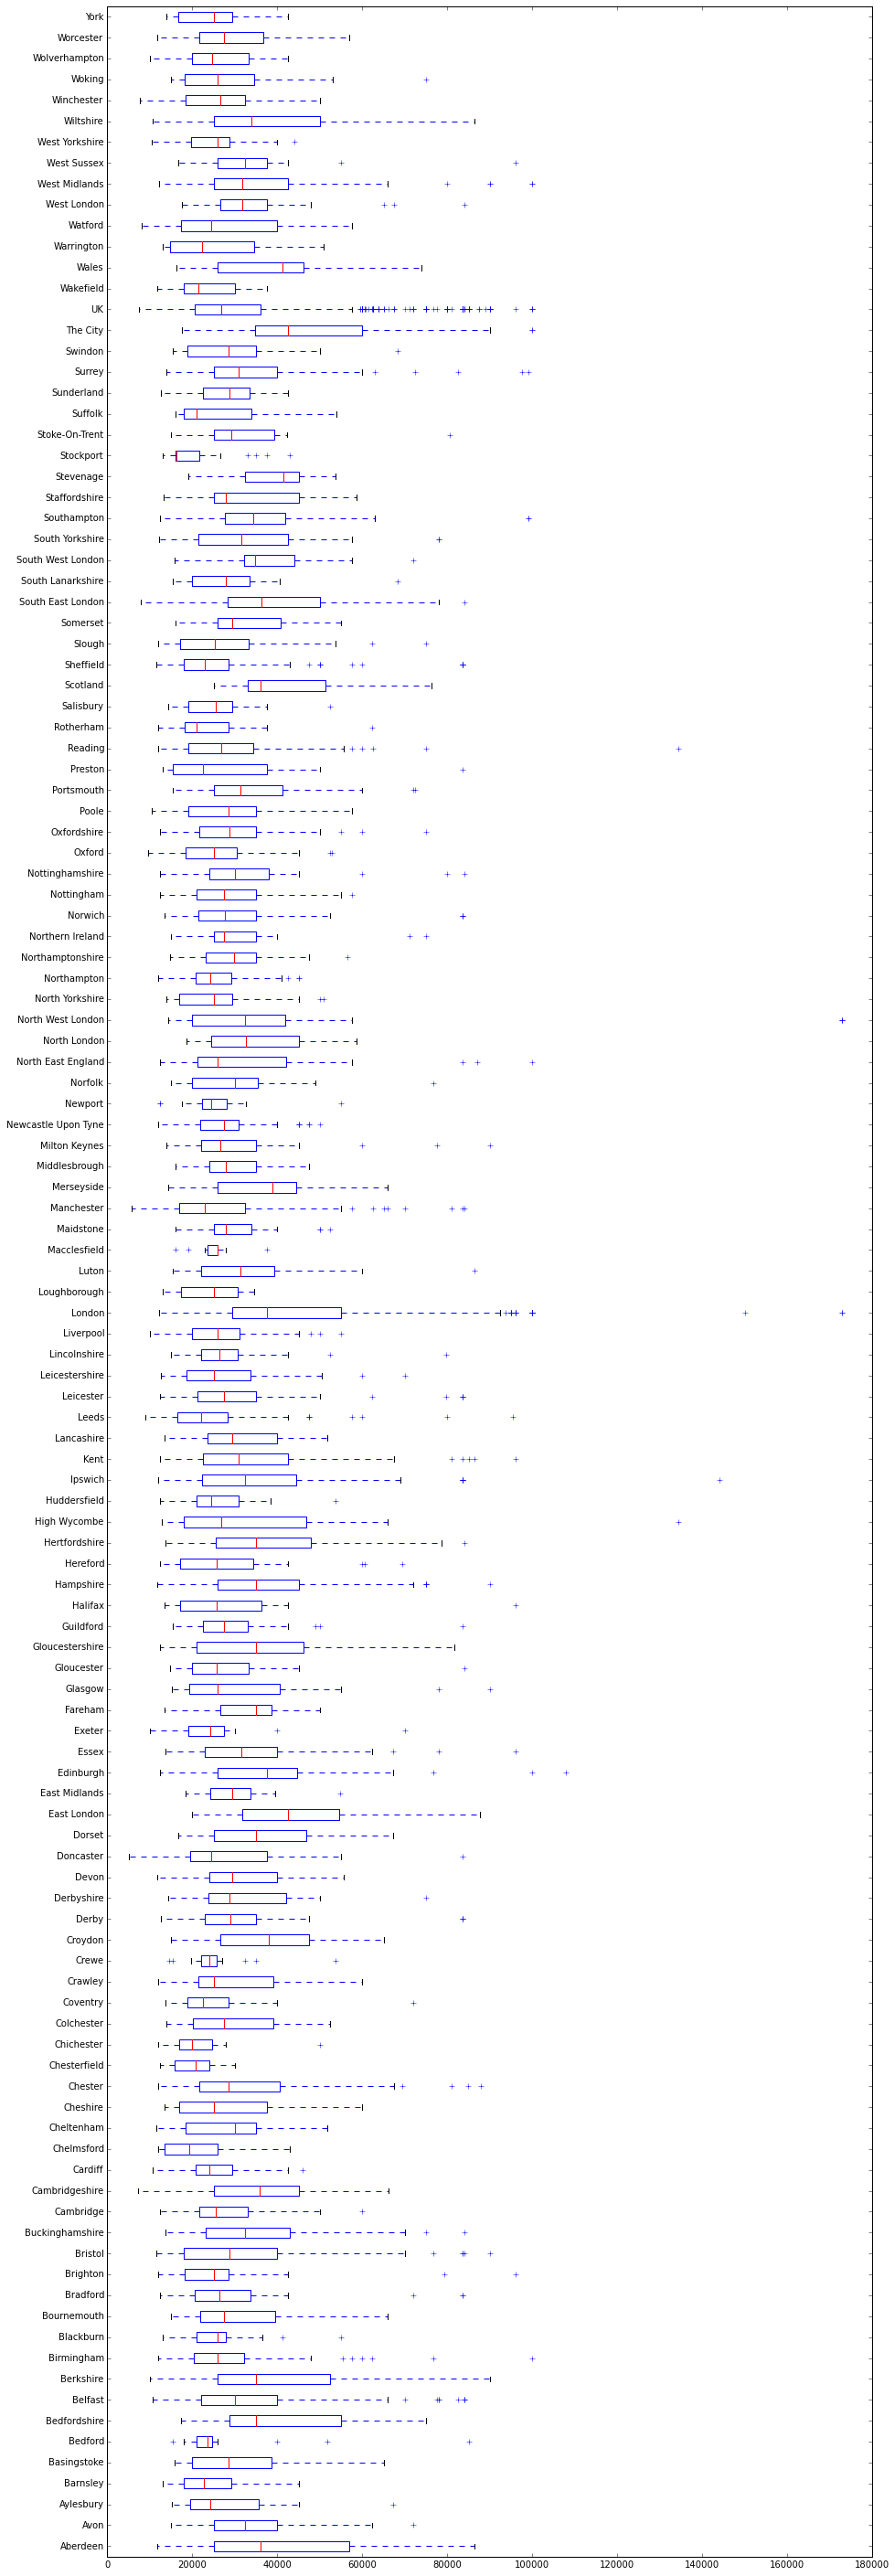

In [187]:
grouped = data.groupby('LocationNormalized')

salary_per_location=[]
locations = []

for location, group in grouped:
    if group.shape[0]>15:
        temp = group['SalaryNormalized'].values
        temp.shape = (-1, 1)
        salary_per_location.append(temp)
        locations.append(location)

fig = plt.figure(figsize=(15,50))
ax_box = fig.add_subplot(111)
ax_box.boxplot(salary_per_location, vert=False)

plt.yticks(np.arange(1, len(locations)+1), locations)
plt.show()

## Exploting ContractType

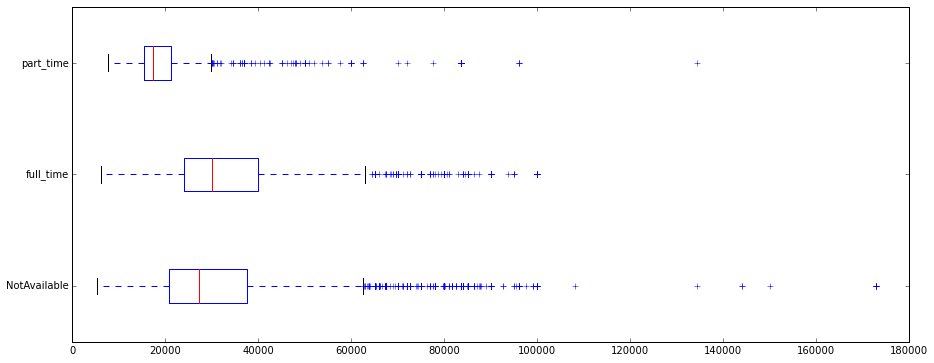

In [204]:
data['ContractType'].fillna('NotAvailable', inplace=True)

grouped = data.groupby('ContractType')

salary_per_contractType=[]
contractTypes = []

for contractType, group in grouped:
    temp = group['SalaryNormalized'].values
    temp.shape = (-1, 1)
    salary_per_contractType.append(temp)
    contractTypes.append(contractType)
    
fig = plt.figure(figsize=(15,6))
ax_box = fig.add_subplot(111)
ax_box.boxplot(salary_per_contractType, vert=False)
plt.yticks(np.arange(1, len(contractTypes)+1), contractTypes)
plt.show()

## Exploring ContractTime

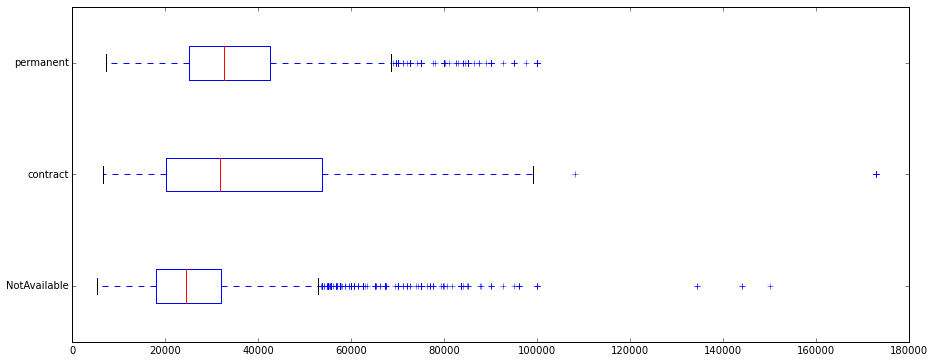

In [214]:
data['ContractTime'].fillna('NotAvailable', inplace=True)

grouped = data.groupby('ContractTime')

salary_per_contractTime=[]
contractTimes = []

for contractTime, group in grouped:
    temp = group['SalaryNormalized'].values
    temp.shape = (-1, 1)
    salary_per_contractTime.append(temp)
    contractTimes.append(contractTime)
    
fig = plt.figure(figsize=(15,6))
ax_box = fig.add_subplot(111)
ax_box.boxplot(salary_per_contractTime, vert=False)
plt.yticks(np.arange(1, len(contractTimes)+1), contractTimes)
plt.show()

## Exploring Catagory

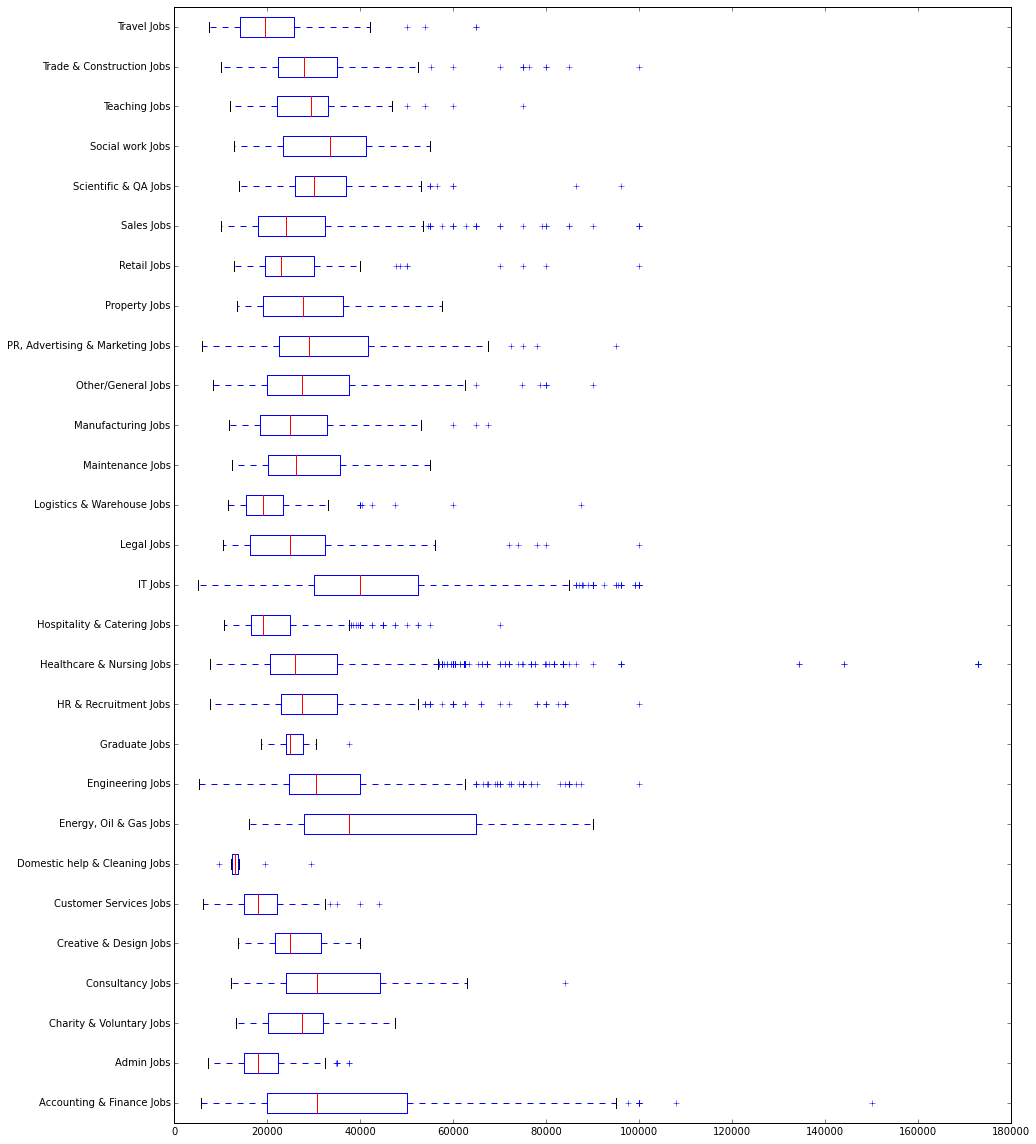

In [216]:
grouped = data.groupby('Category')

salary_per_category=[]
categories = []

for category, group in grouped:
    temp = group['SalaryNormalized'].values
    temp.shape = (-1, 1)
    salary_per_category.append(temp)
    categories.append(category)
    
fig = plt.figure(figsize=(15,20))
ax_box = fig.add_subplot(111)
ax_box.boxplot(salary_per_category, vert=False)
plt.yticks(np.arange(1, len(categories)+1), categories)
plt.show()